In [30]:
import pandas as pd
from langdetect import detect
import re


In [31]:
import nltk

# Download the lexicon
#nltk.download("vader_lexicon")

# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# SentimentIntensityAnalyzer.polarity_score()function provides the polarity of the text rendering the dictionary format
# of 4 keys neg, neu, pos and compound
# neg, neu, and pos should add to 1
# Compound is overall and is between -1 and 1
# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

# Extract Data

## Crypto Data

In [32]:
# Read in doge coin news and market data
doge_df = pd.read_csv("Resources_crypto_articles/doge.csv")

# Read in Cardano coin news and market data
ada_df = pd.read_csv("Resources_crypto_articles/ADA.csv")

# Read in Cardano coin news and market data
avax_df = pd.read_csv("Resources_crypto_articles/AVAX.csv")

# Read in Bitcoin coin news and market data
btc_df = pd.read_csv("Resources_crypto_articles/BTC.csv")

# Read in Ethereum coin news and market data
eth_df = pd.read_csv("Resources_crypto_articles/ETH.csv")

# Read in Litecoin coin news and market data
ltc_df = pd.read_csv("Resources_crypto_articles/LTC.csv")

# Read in Polygon coin news and market data
# Polygon (MATIC) is an Ethereum token that powers the Polygon Network, a scaling solution for Ethereum
matic_df = pd.read_csv("Resources_crypto_articles/MATIC.csv")

# Read in Shiba Inu coin news and market data
shib_df = pd.read_csv("Resources_crypto_articles/SHIB.csv")

# Read in Solana coin news and market data
sol_df = pd.read_csv("Resources_crypto_articles/SOL.csv")

# Read in Uniswap coin news and market data
uni_df = pd.read_csv("Resources_crypto_articles/UNI.csv")

In [29]:
btc_df

,Unnamed: 0,begins_at,open_price,close_price,high_price,low_price,symbol,articles
0,0,2018-02-25,9680.200000,9584.450000,9864.640000,9300.020000,BTC,['Original Pizza Day Purchaser Does It Again W...
1,1,2018-02-26,9592.495000,10318.785000,10452.515000,9378.910000,BTC,['Bitcoin Pizza Day 2: How A Lightning Payment...
2,2,2018-02-27,10318.785000,10548.385000,10861.010000,10140.930000,BTC,"['Rapper 50 Cent, Who Bragged About Owning Bit..."
3,3,2018-02-28,10552.470000,10314.965000,11058.680000,10271.260000,BTC,"['This Is Who Controls Bitcoin', 'British Man ..."
4,4,2018-03-01,10314.965000,10950.900000,11087.430000,10226.540000,BTC,['Bitcoin makes inroads in LA’s residential re...
...,...,...,...,...,...,...,...,...
1821,1821,2023-02-20,24280.247321,24853.059903,25123.529442,23844.178711,BTC,['Bitcoin regains $25K amid hope record China ...
1822,1822,2023-02-21,24853.079620,24456.669930,25275.238494,24152.001328,BTC,['Bitcoin active addresses ‘concern’ analyst d...
1823,1823,2023-02-22,24456.669930,24188.001674,24481.768911,23579.102697,BTC,"['Bitcoin, Ethereum Technical Analysis: BTC Fa..."
1824,1824,2023-02-23,24188.001674,23945.184405,24602.443871,23609.304217,BTC,['Bitcoin bears attempt to pin BTC price under...


### Merge all crypto articles into one df

In [26]:
# Union all of the crypto datasets together
coins = [ada_df, avax_df, btc_df, eth_df, ltc_df, matic_df, shib_df, sol_df, uni_df, doge_df]
crypto = pd.concat(coins)
crypto

,Unnamed: 0,begins_at,open_price,close_price,high_price,low_price,symbol,articles
0,1032,2021-01-02,1.514000,1.514000,1.514000,1.514000,ADA,"['Ripple CTO Reveals His Crypto Holdings, XRP ..."
1,1033,2021-01-03,1.514000,1.514000,1.514000,1.514000,ADA,"['Ripple CTO reveals his holdings in Bitcoin, ..."
2,1034,2021-01-04,1.514000,1.514000,1.514000,1.514000,ADA,"['Bitcoin Welcomes New Money by Dropping $5,00..."
3,1035,2021-01-05,1.514000,1.514000,1.514000,1.514000,ADA,['Cardano Price Prediction: ADA sees a breakou...
4,1036,2021-01-06,1.514000,1.514000,1.514000,1.514000,ADA,['Cardano price prediction: ADA can rise to $1...
...,...,...,...,...,...,...,...,...
792,1821,2023-03-05,0.074631,0.074757,0.076092,0.074297,DOGE,['Dogecoin (DOGE) creator speaks on not workin...
793,1822,2023-03-06,0.074757,0.074786,0.075139,0.073180,DOGE,['$DOGE: Crypto Analytics Firm Explains Why Do...
794,1823,2023-03-07,0.074786,0.074067,0.075977,0.072329,DOGE,['Dogecoin Price Prediction as DOGE Eyes Big B...
795,1824,2023-03-08,0.074067,0.071114,0.074311,0.069978,DOGE,"['Price analysis 3/8: BTC, ETH, BNB, XRP, ADA,..."


## News Snapshots

### Banking

In [4]:
banking_df = pd.read_csv("News_Snapshots/banking_snapshot_410.csv")

In [7]:
banking_df.rename(columns={"summary": "articles", "date":"begins_at"}, inplace=True)

### Crypto

In [15]:
crypto_snap_df = pd.read_csv("News_Snapshots/crypto_snapshot_410.csv")

In [16]:
crypto_snap_df.rename(columns={"summary": "articles", "date":"begins_at"}, inplace=True)

# Transform: Design Functions

## Functions to Transform Data

In [9]:
# Function to remove unwanted characters and to split the articles into lists for each date
def clean_article_list(articles):   
    a = articles.replace("\\n",'')
    return re.split(', \W', a)

In [ ]:
# Function to detect language; if not detectable set as "error"
def detect_lang(article):
    try:
        language = detect(article)
    except:
        language = "error"
    return language

### Cleaning Function
Eliminate all articles not in english.
Vader will be more accurate with separate article titles

In [10]:
def clean_data(df):
    # Cute df to just grab "begins_at" and "articles"
    cut_df = df.loc[:, ["begins_at", "articles"]]
    
    # Replace articles columns with the cleaned lists
    cut_df["articles"] = cut_df["articles"].apply(lambda x: clean_article_list(x)) 

    # Separate the 'articles' column so that each row has a single column
    exploded_df = cut_df.explode("articles")
    
    # Make a language column to detect the language of each article
    exploded_df["language"] = exploded_df["articles"].apply(lambda x: detect_lang(x))

    # Make a new df where the articles are just in English
    clean_df = exploded_df.loc[exploded_df["language"]=='en',:]

    return clean_df

### Vader Function

In [10]:
def apply_vader(df):
    # Predict sentiment for each article
    df["vader_prediction"] = df["articles"].apply(lambda text: sent_analyzer.polarity_scores(text)['compound'])

    # Regroup the df by the date and get the mean sentiment
    df_over_time = df.loc[:,['begins_at','vader_prediction']].groupby('begins_at').mean()
    return df_over_time

### Sentiment Function

In [11]:
# Function to gives a polarity rather than numerical output
def format_output(prediction):
  
  polarity = "neutral"

  if(prediction>= 0.05):
    polarity = "positive"

  elif(prediction<= -0.05):
    polarity = "negative"

  return polarity

### Function to calculate the % change in the closing price

In [37]:
# Design function that
# sets the first day to 0% change
# calculates the change in closing price for each day
def close_price_change(col_cp):     # Input is close price column of a df
    cp = list(col_cp)   # convert the series into a list
    delta_cp = [100* round((cp[n] - cp[n-1] )/ cp[n], 3) for n in range(1, len(cp))]    # calculate the percent change for each day's cp but skip the first day
    return [delta_cp[0]] + delta_cp # Return list with backfilled first day


In [38]:
btc_df["delta_close_price"] = close_price_change(btc_df["close_price"])
btc_df

,Unnamed: 0,begins_at,open_price,close_price,high_price,low_price,symbol,articles,delta_close_price
0,0,2018-02-25,9680.200000,9584.450000,9864.640000,9300.020000,BTC,['Original Pizza Day Purchaser Does It Again W...,7.1
1,1,2018-02-26,9592.495000,10318.785000,10452.515000,9378.910000,BTC,['Bitcoin Pizza Day 2: How A Lightning Payment...,7.1
2,2,2018-02-27,10318.785000,10548.385000,10861.010000,10140.930000,BTC,"['Rapper 50 Cent, Who Bragged About Owning Bit...",2.2
3,3,2018-02-28,10552.470000,10314.965000,11058.680000,10271.260000,BTC,"['This Is Who Controls Bitcoin', 'British Man ...",-2.3
4,4,2018-03-01,10314.965000,10950.900000,11087.430000,10226.540000,BTC,['Bitcoin makes inroads in LA’s residential re...,5.8
...,...,...,...,...,...,...,...,...,...
1821,1821,2023-02-20,24280.247321,24853.059903,25123.529442,23844.178711,BTC,['Bitcoin regains $25K amid hope record China ...,2.3
1822,1822,2023-02-21,24853.079620,24456.669930,25275.238494,24152.001328,BTC,['Bitcoin active addresses ‘concern’ analyst d...,-1.6
1823,1823,2023-02-22,24456.669930,24188.001674,24481.768911,23579.102697,BTC,"['Bitcoin, Ethereum Technical Analysis: BTC Fa...",-1.1
1824,1824,2023-02-23,24188.001674,23945.184405,24602.443871,23609.304217,BTC,['Bitcoin bears attempt to pin BTC price under...,-1.0


# Transform: Apply Functions to Data

### Clean and Transform

In [14]:
# Clean the doge data via the clean function 
doge_clean = clean_data(doge_df)
doge_clean

,begins_at,articles,language
0,2021-01-02,"['Dogecoin Spikes 120%: If History Repeats, Th...",en
0,2021-01-02,Dogecoin Sees 125% Increase In Trading On Satu...,en
0,2021-01-02,Dogecoin (DOGE) surges over 100% as Bitcoin bu...,en
0,2021-01-02,"Ripple CTO Reveals His Crypto Holdings, XRP an...",en
0,2021-01-02,Here’s Why Analysts Think Ethereum Will Soon M...,en
...,...,...,...
796,2023-03-09,Why Dogecoin Is Getting Hammered By Benzinga',en
796,2023-03-09,Why Dogelon Mars (ELON) Is Up 3% Today',en
796,2023-03-09,The Future Of Crypto: Commit To Locking Your D...,en
796,2023-03-09,New Meme Crypto Big Eyes Coin Excels with its ...,en


In [ ]:
# # Clean the crypto data via the clean function 
all_crypto_clean = clean_data(crypto)
all_crypto_clean

### Apply Sentiment Analysis

In [ ]:
# Apply vader function
doge_vader = apply_vader(doge_clean)
doge_vader

In [ ]:
# Apply format function to get polarity
doge_vader["sentiment"] = doge_vader["vader_prediction"].apply(lambda x: format_output(x))
doge_vader

In [13]:
# Apply vader function to banking_df
banking_snap_vader = apply_vader(banking_df)
banking_snap_vader

,vader_prediction
begins_at,
2023-03-11,-0.298900
2023-03-12,0.069800
2023-03-13,-0.161553
2023-03-14,-0.382086
2023-03-15,-0.299586
2023-03-16,0.000383
2023-03-17,-0.185243
2023-03-19,0.163720
2023-03-20,0.164633


In [18]:
# Apply format function to get polarity
banking_snap_vader["sentiment"] = banking_snap_vader["vader_prediction"].apply(lambda x: format_output(x))

In [17]:
# Apply vader function to crypto snap shot
crypto_snap_vader = apply_vader(crypto_snap_df)
crypto_snap_vader

,vader_prediction
begins_at,
2023-03-11,0.000000
2023-03-12,-0.164450
2023-03-13,-0.127312
2023-03-14,-0.276814
2023-03-15,-0.005550
2023-03-16,-0.403700
2023-03-17,-0.526700
2023-03-20,-0.463160
2023-03-21,-0.086000


In [19]:
# Apply format function to get polarity
crypto_snap_vader["sentiment"] = crypto_snap_vader["vader_prediction"].apply(lambda x: format_output(x))

# Initial Analysis

In [14]:
doge_vader.reset_index(inplace=True)

In [18]:
doge_vader.rename(columns={'begins_at': "date"}, inplace=True)

In [19]:
# Convert the date column format from string to datetime
doge_vader = doge_vader.astype({"date": "datetime64"})

<AxesSubplot:xlabel='date'>

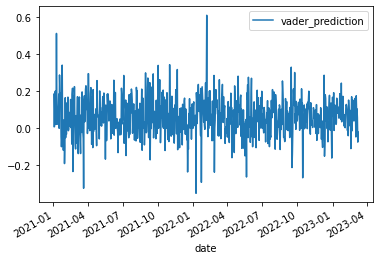

In [20]:
doge_vader.plot.line(x="date", y="vader_prediction")

# Collect Closing Data for each day

In [27]:
crypto.columns

Index(['Unnamed: 0', 'begins_at', 'open_price', 'close_price', 'high_price',
       'low_price', 'symbol', 'articles'],
      dtype='object')

In [28]:
crypto_close = crypto.loc[:,["begins_at", "close_price"]].groupby("begins_at").mean()
crypto_close.rename(columns={"begins_at":"date"}, inplace=True)
crypto_close


,close_price
begins_at,
2018-02-25,9584.450000
2018-02-26,3729.038335
2018-02-27,3806.526669
2018-02-28,3722.003335
2018-03-01,3940.290002
...,...
2023-03-05,19.278365
2023-03-06,18.907911
2023-03-07,22.235490


# Load Data

In [21]:
doge_vader

,date,vader_prediction,sentiment
0,2021-01-02,0.183320,positive
1,2021-01-03,0.007371,neutral
2,2021-01-04,0.011000,neutral
3,2021-01-05,0.183663,positive
4,2021-01-06,0.200137,positive
...,...,...,...
791,2023-03-05,0.082570,positive
792,2023-03-06,0.104460,positive
793,2023-03-07,0.056780,positive
794,2023-03-08,-0.074480,negative


### All Crypto 

In [ ]:
doge_vader.to_csv("Sentiments/all_crypto_sentiment.csv")

### Doge Coin

In [22]:
doge_vader.to_csv("Sentiments/doge_sentiment.csv")

### Banking Snapshot April 2023

In [20]:
banking_snap_vader.to_csv("Sentiments/bankingsnap_sentiments_410.csv")

### Crypto Snapshot April 2023

In [21]:
crypto_snap_vader.to_csv("Sentiments/crypto_snapshot_sentiments_410.csv")